Problem statement:- In this dataset of Hr_attrition we have (34) independent variables and (1) dependent variable which is "Attrition".In this case we have to build a machine learning classifier model .

# Importing the important libraries.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset in dataframe.

In [31]:
df=pd.read_csv("attrition.csv")

In [32]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [33]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [34]:

for columns in df.columns:
    print(columns,"=",df[columns].nunique())

Age = 43
Attrition = 2
BusinessTravel = 3
DailyRate = 886
Department = 3
DistanceFromHome = 29
Education = 5
EducationField = 6
EmployeeCount = 1
EmployeeNumber = 1470
EnvironmentSatisfaction = 4
Gender = 2
HourlyRate = 71
JobInvolvement = 4
JobLevel = 5
JobRole = 9
JobSatisfaction = 4
MaritalStatus = 3
MonthlyIncome = 1349
MonthlyRate = 1427
NumCompaniesWorked = 10
Over18 = 1
OverTime = 2
PercentSalaryHike = 15
PerformanceRating = 2
RelationshipSatisfaction = 4
StandardHours = 1
StockOptionLevel = 4
TotalWorkingYears = 40
TrainingTimesLastYear = 7
WorkLifeBalance = 4
YearsAtCompany = 37
YearsInCurrentRole = 19
YearsSinceLastPromotion = 16
YearsWithCurrManager = 18


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [36]:
pd.set_option('max_columns', None)

In [37]:
df.head(6)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   
5                        4    Male          79               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   
5  Laboratory Technician                4        Single           3068   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   
5        11864                   0      Y       No                 13   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   
5                  3                         3             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   
5                 0                  8                      2   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   
5                2               7                   7   

   YearsSinceLastPromotion  YearsWithCur

In [38]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [39]:
df["BusinessTravel"].value_counts()


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [40]:
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [41]:
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [42]:
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [43]:
df["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [44]:
df["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [45]:
df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [46]:
df["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

# Exploratory data analysis

In [47]:
data = [go.Bar(
            x=df["Department"].value_counts().index.values,
            y= df["Department"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')


We can see from above plot that maximum employee belongs to the 'Research & Development'.

In [48]:
data = [go.Bar(
            x=df["MaritalStatus"].value_counts().index.values,
            y= df["MaritalStatus"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

Most of employees in our dataset are married.

In [49]:
data = [go.Bar(
            x=df["JobRole"].value_counts().index.values,
            y= df["JobRole"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

Mostof the employees have the  job-role of "Sales-Executive" in our dataset

In [50]:
data = [go.Bar(
            x=df["Gender"].value_counts().index.values,
            y= df["Gender"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

Most of the employees in our dataset are "Male".

In [51]:
data = [go.Bar(
            x=df["EducationField"].value_counts().index.values,
            y= df["EducationField"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

Most of the employees in our dataset belongs to Life Sciences

In [52]:
#lets drop the column Over18 since it contain only single categorical value throughout the dataset
df1=df.drop(['Over18'], axis = 1)

In [53]:
df1

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  \
0           Single           5993        19479                   8      Yes   
1          Married           5130        24907                   1       No   
2           Single           2090         2396                   6      Yes   
3          Married           2909        23159                   1      Yes   
4          Married           3468        16632                   9       No   
...            ...            ...   

In [54]:
#lets do the one hot encoding to all nominal categories column and dropping one of column to remove the multicollinearity issue.
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',"Gender",'JobRole',"MaritalStatus","OverTime"] 


df2 = pd.get_dummies(df1, columns = categorical_cols,drop_first=True)

We have created many dummy features and in order to cope up with dummy variable trap we are deleting one columns from each

In [55]:
df2

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0            2                4           5993        19479   
1            2                2           5130        24907   
2            1                3           2090         2396   
3            1                3           2909        23159   
4            1                2           3468        16632   
...        ...              ...            ...          ...   
1465         2                4           2571        12290   
1466         3                1           9991        21457   
1467         2                2           6142         5174   
1468         2                2           5390        13243   
1469         2                3           4404        10228   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                      8                 11                  3   
1                      1                 23                  4   
2                      6                 15                  3   
3                      1                 11                  3   
4                      9                 12                  3   
...                  ...                ...                ...   
1465                   4                 17                  3   
1466                   4                 15                  3   
1467                   1                 20                  4   
1468                   2                 14                  3   
1469                   2                 12                  3   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1465                         3             80                 1   
1466                         1             80                 1   
1467                         2             80                 1   
1468                         4             8

In [56]:
#Column list of our dataset.
df2.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufactur

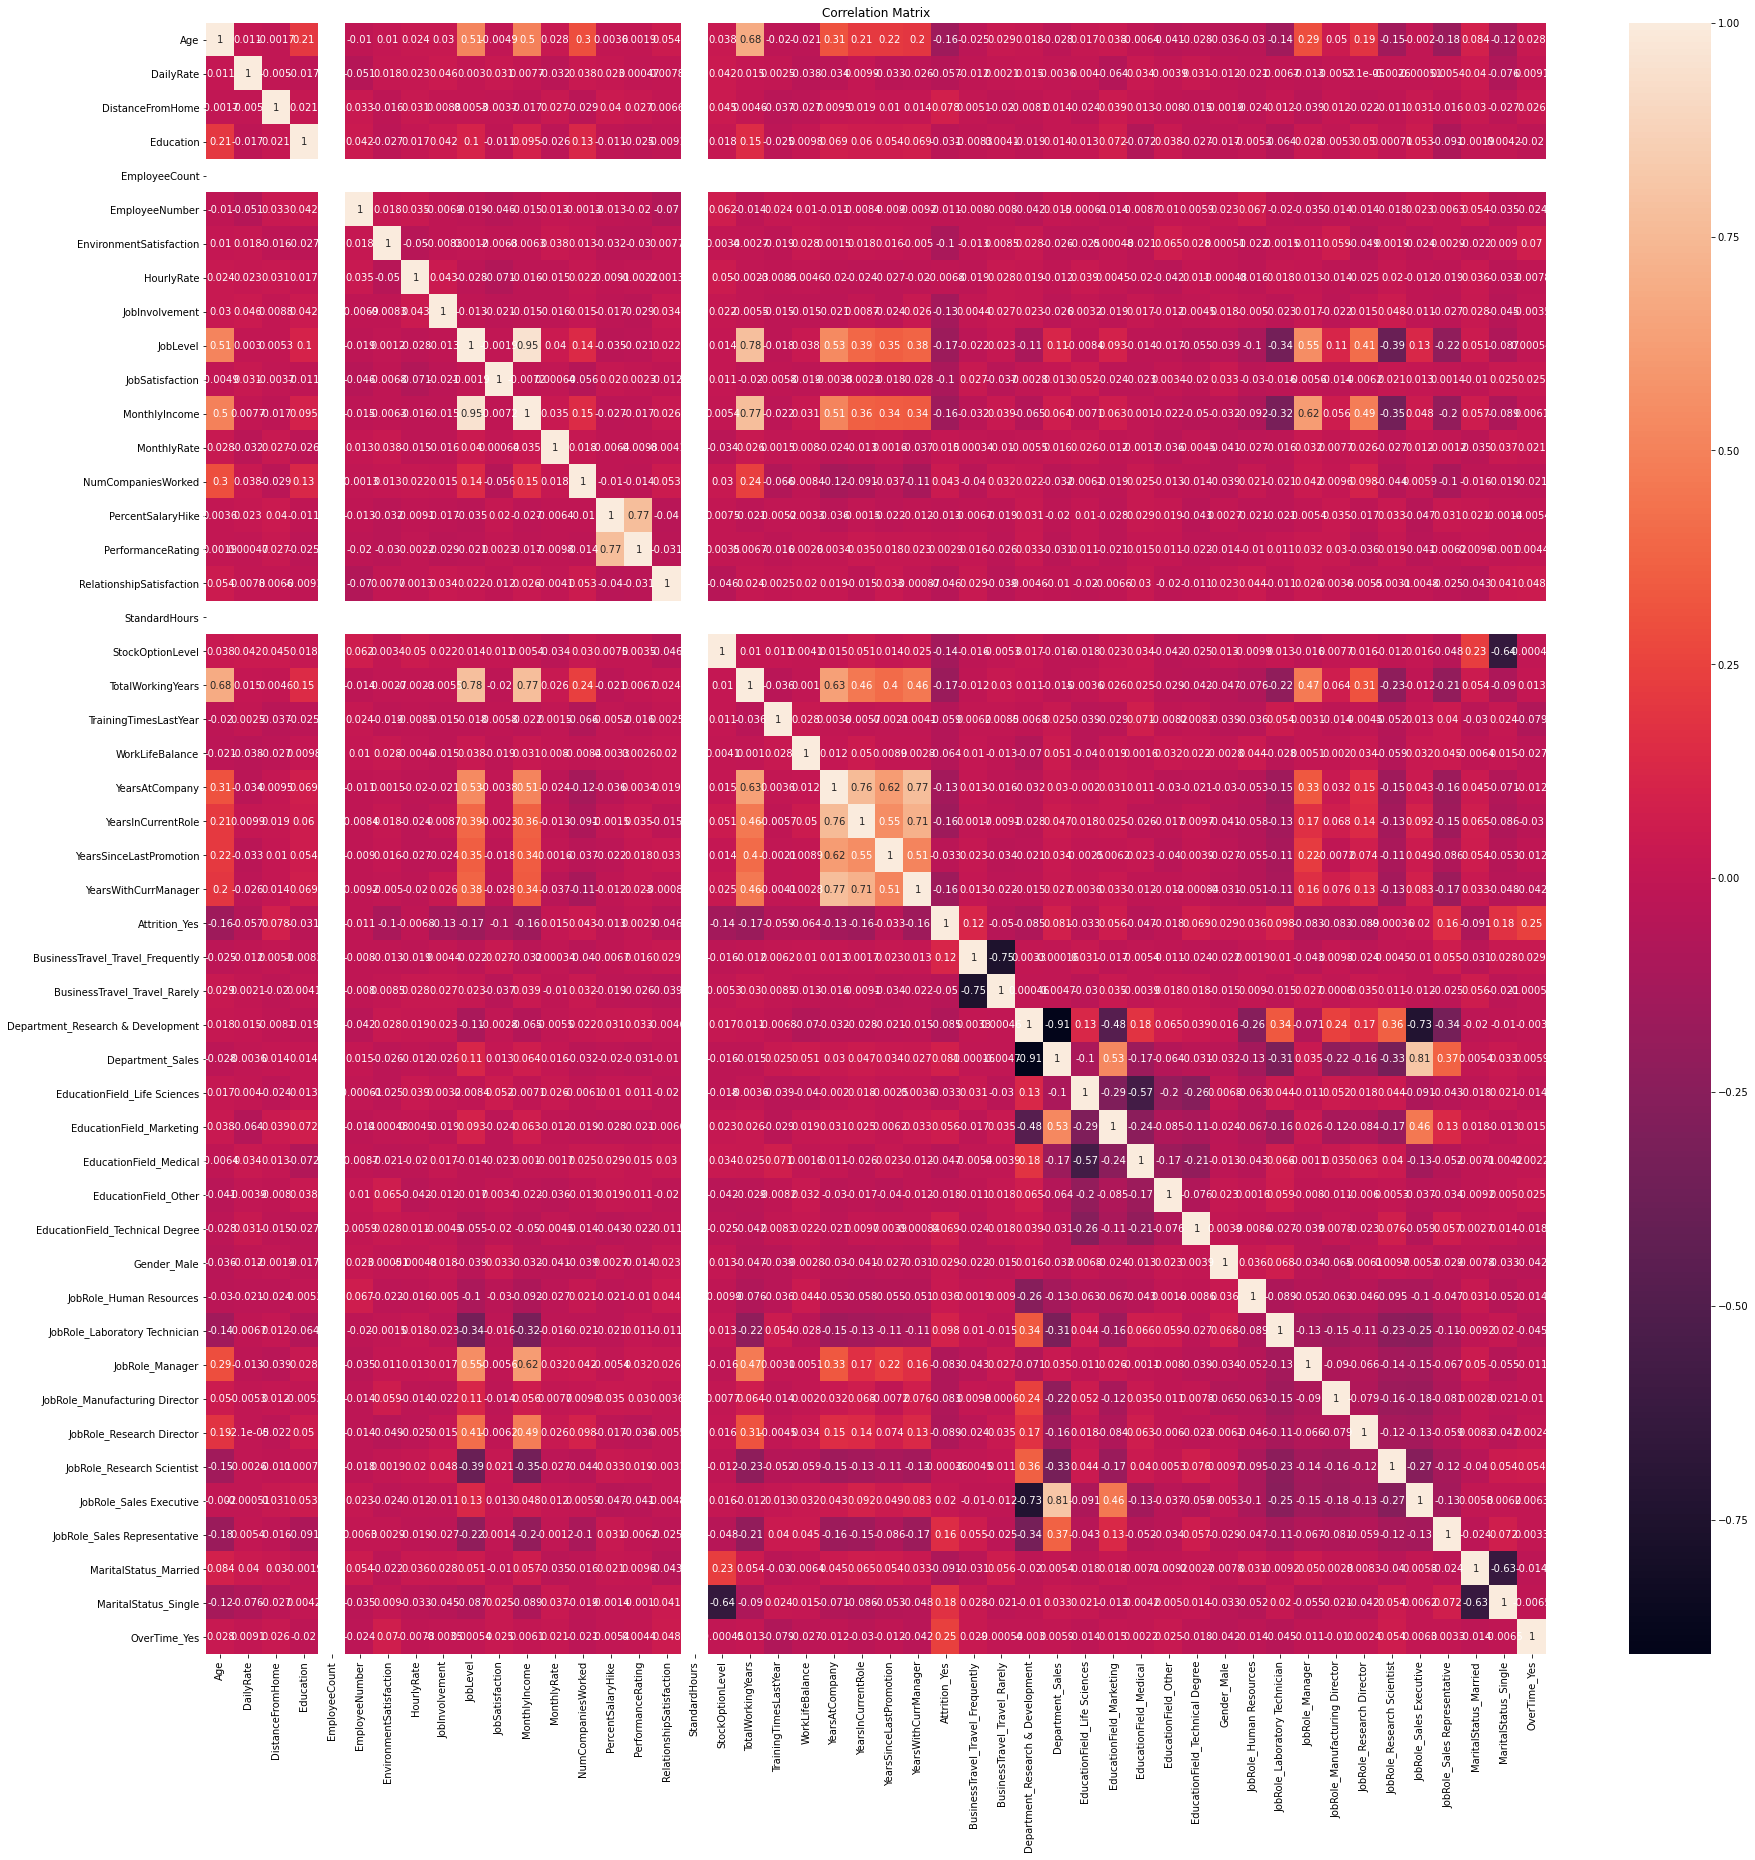

In [57]:
#visualising the heat map for the correlation
corr_mat=df2.corr()
plt.figure(figsize=[30,30])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [58]:
#Getting the numerical values of correlation
corr_matrix=df2.corr()
corr_matrix["Attrition_Yes"].sort_values(ascending=False)

Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

From the above correlation rows we can conclude that
Attrition_Yes has somewhat positive correlation with column like OverTime_Yes,MaritalStatus_Single,JobRole_Sales Representative etc.


Attrition_Yes has somewhat negative correlation with column like
YearsInCurrentRole,JobLevel,TotalWorkingYears etc.



In [59]:
df2_col=['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']

In [60]:
import plotly.express as px
for i in df2_col:
    fig = px.box(df[i])
    fig.show()

KeyError: 'Attrition_Yes'

MonthlyIncome,NumCompaniesWorked,PerformanceRating, StockOptionLevel ,TotalWorkingYears, TrainingTimesLastYear,YearsAtCompany, YearsInCurrentRole,YearsSinceLastPromotion, YearsWithCurrManager----These all columns contains outliers.

Since many columns are categorical type and a few contain small outliers hence we are not removing the outliers.

In [61]:
df2.shape

(1470, 48)

# Bifurcating the dataset into independent variables and target variables.

In [62]:
x=df2.drop(['Attrition_Yes'], axis = 1)
y=df2["Attrition_Yes"]

In [63]:
x

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0            2                4           5993        19479   
1            2                2           5130        24907   
2            1                3           2090         2396   
3            1                3           2909        23159   
4            1                2           3468        16632   
...        ...              ...            ...          ...   
1465         2                4           2571        12290   
1466         3                1           9991        21457   
1467         2                2           6142         5174   
1468         2                2           5390        13243   
1469         2                3           4404        10228   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                      8                 11                  3   
1                      1                 23                  4   
2                      6                 15                  3   
3                      1                 11                  3   
4                      9                 12                  3   
...                  ...                ...                ...   
1465                   4                 17                  3   
1466                   4                 15                  3   
1467                   1                 20                  4   
1468                   2                 14                  3   
1469                   2                 12                  3   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1465                         3             80                 1   
1466                         1             80                 1   
1467                         2             80                 1   
1468                         4             8

In [64]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_Yes, Length: 1470, dtype: uint8

# Train Test Split

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Standard Scaling the dataset

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Training the logistics regression model on training set

In [67]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [68]:
y_pred=classifier.predict(x_test)

In [69]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [70]:
#importing important metrics
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[240   6]
 [ 30  18]]


0.8775510204081632

In [71]:
#Doing cross validation to counter overfitting of the model.
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,y_pred)
for i in range (2,10):
    lsscore=cross_val_score(classifier,x,y,cv=i)
    lsc=lsscore.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",lsc*100)
    print("accuracy_score is:",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.27210884353741
accuracy_score is: 87.75510204081633


At cv:- 3
Cross validation score is:- 84.01360544217687
accuracy_score is: 87.75510204081633


At cv:- 4
Cross validation score is:- 84.0816031868262
accuracy_score is: 87.75510204081633


At cv:- 5
Cross validation score is:- 84.08163265306122
accuracy_score is: 87.75510204081633


At cv:- 6
Cross validation score is:- 84.14965986394559
accuracy_score is: 87.75510204081633


At cv:- 7
Cross validation score is:- 84.14965986394557
accuracy_score is: 87.75510204081633


At cv:- 8
Cross validation score is:- 84.14966440959847
accuracy_score is: 87.75510204081633


At cv:- 9
Cross validation score is:- 84.150082298369
accuracy_score is: 87.75510204081633




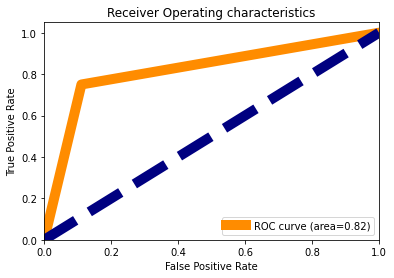

In [72]:
#AUC_ROC Curve
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve (area=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating characteristics')
plt.legend(loc="lower right")
plt.show()

# Training our model on KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
y_pred=classifier.predict(x_test)

In [75]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[244   2]
 [ 45   3]]


0.8401360544217688

In [76]:
#Cross validation for checking model overfitting.
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,y_pred)
for i in range (2,10):
    lsscore=cross_val_score(classifier,x,y,cv=i)
    lsc=lsscore.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",lsc*100)
    print("accuracy_score is:",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.95238095238095
accuracy_score is: 84.01360544217688


At cv:- 3
Cross validation score is:- 82.24489795918367
accuracy_score is: 84.01360544217688


At cv:- 4
Cross validation score is:- 82.10927319038028
accuracy_score is: 84.01360544217688


At cv:- 5
Cross validation score is:- 82.10884353741497
accuracy_score is: 84.01360544217688


At cv:- 6
Cross validation score is:- 81.29251700680273
accuracy_score is: 84.01360544217688


At cv:- 7
Cross validation score is:- 81.29251700680271
accuracy_score is: 84.01360544217688


At cv:- 8
Cross validation score is:- 81.90670289855073
accuracy_score is: 84.01360544217688


At cv:- 9
Cross validation score is:- 81.6345786157248
accuracy_score is: 84.01360544217688




# Training our model on SVM linear kernel

In [77]:
from sklearn.svm import SVC
classifier =SVC(kernel="linear",random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [78]:
y_pred=classifier.predict(x_test)

In [79]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[242   4]
 [ 30  18]]


0.8843537414965986

In [80]:
#from sklearn.model_selection import cross_val_score
#lss=accuracy_score(y_test,y_pred)

#lsscore=cross_val_score(classifier,x,y,cv=5)
#lsc=lsscore.mean()
#print("At cv:-",5)
#print("Cross validation score is:-",lsc*100)
#print("accuracy_score is:",lss*100)
#print("\n")

# Training our model on SVM rbf kernel

In [81]:
from sklearn.svm import SVC
classifier =SVC(kernel="rbf",random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [82]:
y_pred=classifier.predict(x_test)

In [83]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[246   0]
 [ 38  10]]


0.8707482993197279

In [84]:
#cross validation to check model overfitting.
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,y_pred)
for i in range (2,10):
    lsscore=cross_val_score(classifier,x,y,cv=i)
    lsc=lsscore.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",lsc*100)
    print("accuracy_score is:",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 83.87755102040816
accuracy_score is: 87.07482993197279


At cv:- 3
Cross validation score is:- 83.87755102040816
accuracy_score is: 87.07482993197279


At cv:- 4
Cross validation score is:- 83.87761373060064
accuracy_score is: 87.07482993197279


At cv:- 5
Cross validation score is:- 83.87755102040816
accuracy_score is: 87.07482993197279


At cv:- 6
Cross validation score is:- 83.87755102040816
accuracy_score is: 87.07482993197279


At cv:- 7
Cross validation score is:- 83.87755102040816
accuracy_score is: 87.07482993197279


At cv:- 8
Cross validation score is:- 83.8779252791637
accuracy_score is: 87.07482993197279


At cv:- 9
Cross validation score is:- 83.87824829168538
accuracy_score is: 87.07482993197279




# Training our dataset on Naive Bayes model

In [85]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [86]:
y_pred=classifier.predict(x_test)

In [87]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[167  79]
 [ 13  35]]


0.6870748299319728

In [88]:
#Cross validation to check model overfitting.
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,y_pred)
for i in range (2,10):
    lsscore=cross_val_score(classifier,x,y,cv=i)
    lsc=lsscore.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",lsc*100)
    print("accuracy_score is:",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 69.8639455782313
accuracy_score is: 68.70748299319727


At cv:- 3
Cross validation score is:- 77.9591836734694
accuracy_score is: 68.70748299319727


At cv:- 4
Cross validation score is:- 77.68481222603957
accuracy_score is: 68.70748299319727


At cv:- 5
Cross validation score is:- 78.16326530612245
accuracy_score is: 68.70748299319727


At cv:- 6
Cross validation score is:- 77.21088435374149
accuracy_score is: 68.70748299319727


At cv:- 7
Cross validation score is:- 77.00680272108843
accuracy_score is: 68.70748299319727


At cv:- 8
Cross validation score is:- 76.32862615823237
accuracy_score is: 68.70748299319727


At cv:- 9
Cross validation score is:- 76.11518446472807
accuracy_score is: 68.70748299319727




# Training our model on Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [90]:
y_pred=classifier.predict(x_test)

In [91]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[220  26]
 [ 33  15]]


0.7993197278911565

In [92]:
#Cross validation to check the overfitting of the model
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,y_pred)
for i in range (2,10):
    lsscore=cross_val_score(classifier,x,y,cv=i)
    lsc=lsscore.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",lsc*100)
    print("accuracy_score is:",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 75.98639455782313
accuracy_score is: 79.93197278911565


At cv:- 3
Cross validation score is:- 75.85034013605441
accuracy_score is: 79.93197278911565


At cv:- 4
Cross validation score is:- 79.72803873948584
accuracy_score is: 79.93197278911565


At cv:- 5
Cross validation score is:- 77.61904761904762
accuracy_score is: 79.93197278911565


At cv:- 6
Cross validation score is:- 77.14285714285714
accuracy_score is: 79.93197278911565


At cv:- 7
Cross validation score is:- 80.06802721088435
accuracy_score is: 79.93197278911565


At cv:- 8
Cross validation score is:- 79.0512146590639
accuracy_score is: 79.93197278911565


At cv:- 9
Cross validation score is:- 78.30357291302975
accuracy_score is: 79.93197278911565




# Training our model on Random Forest classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=1)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [94]:
y_pred=classifier.predict(x_test)

In [95]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[244   2]
 [ 41   7]]


0.8537414965986394

In [96]:
#Cross validation to check the overfitting of the model
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,y_pred)
for i in range (2,10):
    lsscore=cross_val_score(classifier,x,y,cv=i)
    lsc=lsscore.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",lsc*100)
    print("accuracy_score is:",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 84.28571428571429
accuracy_score is: 85.37414965986395


At cv:- 3
Cross validation score is:- 84.76190476190476
accuracy_score is: 85.37414965986395


At cv:- 4
Cross validation score is:- 85.23834557516882
accuracy_score is: 85.37414965986395


At cv:- 5
Cross validation score is:- 85.03401360544217
accuracy_score is: 85.37414965986395


At cv:- 6
Cross validation score is:- 84.62585034013607
accuracy_score is: 85.37414965986395


At cv:- 7
Cross validation score is:- 85.23809523809524
accuracy_score is: 85.37414965986395


At cv:- 8
Cross validation score is:- 85.44450879068663
accuracy_score is: 85.37414965986395


At cv:- 9
Cross validation score is:- 85.03291934759838
accuracy_score is: 85.37414965986395




# The difference between cross val score and accuracy score is minimum for the "Random Forest Classifier" which is 0.336. Hence Random Forest Classifier is our best model.

# Hyperparameter tuning

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
#creating parameter list to pass in GridSearchCv

In [99]:
parameter={ "criterion":["gini","entropy"],"max_depth":np.arange(2,10)}

In [100]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [101]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [102]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [103]:
accuracy_score(y_test,GCV_pred)

0.8673469387755102

In [104]:
#Dumping our model
import joblib   
joblib.dump(GCV.best_estimator_,"HRATTRITIONrfc.pkl")

['HRATTRITIONrfc.pkl']